In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
%matplotlib inline

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

students_df = pd.read_sql_query('select * from studentsperformance',con=engine)

In [4]:
students_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

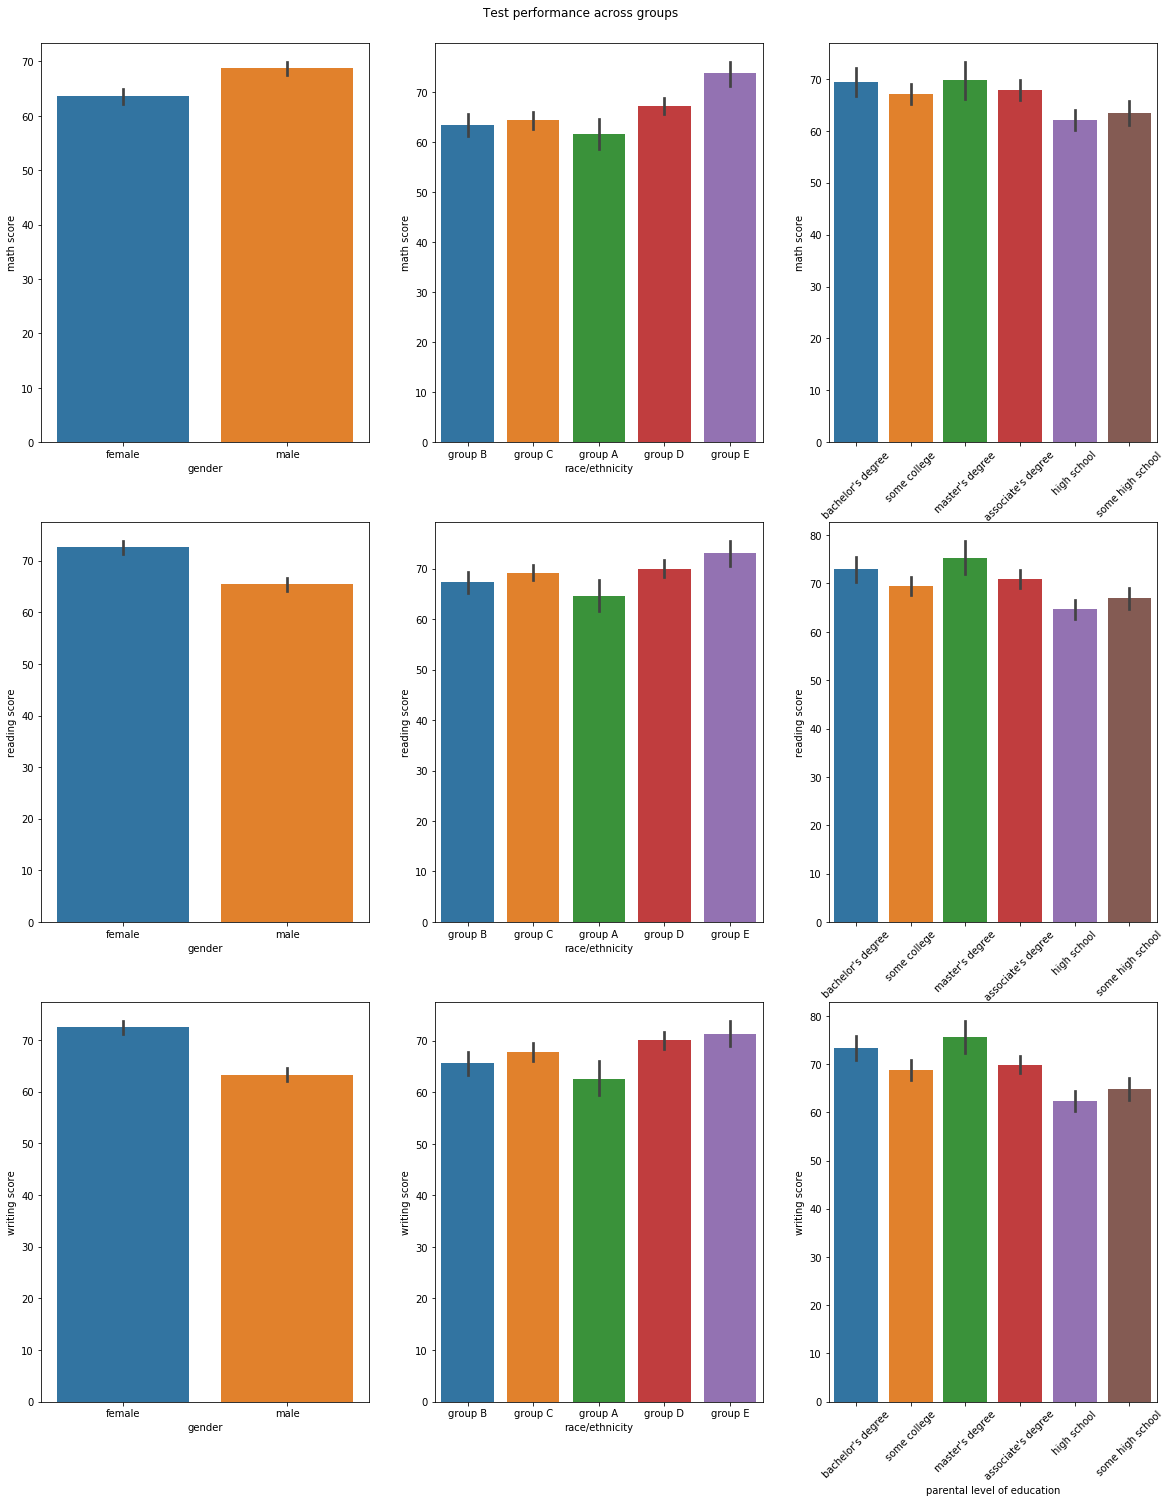

In [22]:
fig, axes = plt.subplots(3,3,figsize=(20,25))

#Math

sns.barplot(x='gender', y='math score', data=students_df, ax=axes[0,0])

sns.barplot(x='race/ethnicity', y='math score', data=students_df, ax=axes[0,1])

sns.barplot(x='parental level of education', y='math score', data=students_df, ax=axes[0,2])
for label in axes[0,2].get_xticklabels():
    label.set_rotation(45)

#Reading

sns.barplot(x='gender', y='reading score', data=students_df, ax=axes[1,0])

sns.barplot(x='race/ethnicity', y='reading score', data=students_df, ax=axes[1,1])

sns.barplot(x='parental level of education', y='reading score', data=students_df, ax=axes[1,2])
for label in axes[1,2].get_xticklabels():
    label.set_rotation(45)
    
#Writing

sns.barplot(x='gender', y='writing score', data=students_df, ax=axes[2,0])

sns.barplot(x='race/ethnicity', y='writing score', data=students_df, ax=axes[2,1])

sns.barplot(x='parental level of education', y='writing score', data=students_df, ax=axes[2,2])

for label in axes[2,2].get_xticklabels():
    label.set_rotation(45)

plt.suptitle('Test performance across groups', y=.9)
plt.show()

In [32]:
#Gender differences in test performance

test_variables = ['math score', 'reading score', 'writing score']

for variable in test_variables:
    p = list(stats.ttest_ind(students_df[students_df['gender']== 'male'][variable], 
              students_df[students_df['gender']== 'female'][variable]))[1]
    if p < 0.05:
        print('Significant differences between genders for {}'.format(variable))
        print('p-value = {}'.format(p) + '\n')

Significant differences between genders for math score
p-value = 9.120185549328822e-08

Significant differences between genders for reading score
p-value = 4.680538743933289e-15

Significant differences between genders for writing score
p-value = 2.019877706867934e-22



In [37]:
#Race/ethnicity differences in test performance

races = students_df['race/ethnicity'].unique()

for variable in test_variables:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(variable))
    print("------------------------------------------------")
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            p = list(stats.ttest_ind(
                students_df[students_df["race/ethnicity"]==races[i]][variable], 
                students_df[students_df["race/ethnicity"]==races[j]][variable]
                ))[1]
            if p < 0.05:
                    print('Significant differences between {0} and {1}'.format(races[i], races[j]))
                    print('p-value = {}'.format(p) + '\n')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
Significant differences between group B and group D
p-value = 0.004886197137104194

Significant differences between group B and group E
p-value = 5.007946047497971e-09

Significant differences between group C and group D
p-value = 0.015888349556016285

Significant differences between group C and group E
p-value = 1.927238849552764e-09

Significant differences between group A and group D
p-value = 0.0009068636053543751

Significant differences between group A and group E
p-value = 1.083559122656415e-08

Significant differences between group D and group E
p-value = 2.3187640326715042e-05

------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
Significant differences between group B and group E
p-value = 0.0007951618495240944

Significant differences between group C and grou

In [39]:
#Race/ethnicity differences in test performance

ed_level = students_df['parental level of education'].unique()

for variable in test_variables:
    print("------------------------------------------------")
    print("Comparisons for variable: {}".format(variable))
    print("------------------------------------------------")
    for i in range(0, len(ed_level)):
        for j in range(i+1, len(ed_level)):
            p = list(stats.ttest_ind(
                students_df[students_df["parental level of education"]==ed_level[i]][variable], 
                students_df[students_df["parental level of education"]==ed_level[j]][variable]
                ))[1]
            if p < 0.05:
                    print('Significant differences between {0} and {1}'.format(ed_level[i], ed_level[j]))
                    print('p-value = {}'.format(p) + '\n')

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
Significant differences between bachelor's degree and high school
p-value = 2.9965345853843376e-05

Significant differences between bachelor's degree and some high school
p-value = 0.0015409192922812146

Significant differences between some college and high school
p-value = 0.00043498004192453146

Significant differences between some college and some high school
p-value = 0.016324361572645503

Significant differences between master's degree and high school
p-value = 0.000570929230228812

Significant differences between master's degree and some high school
p-value = 0.008736228790471057

Significant differences between associate's degree and high school
p-value = 9.247314274963044e-05

Significant differences between associate's degree and some high school
p-value = 0.005041081492906143

------------------------------------------------
Comparisons for va

# 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

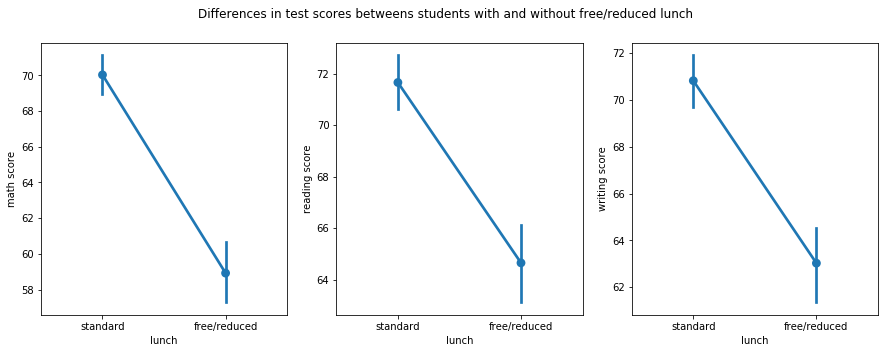

In [50]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x='lunch', y='math score', data=students_df, ax=axes[0])

sns.pointplot(x='lunch', y='reading score', data=students_df, ax=axes[1])

sns.pointplot(x='lunch', y='writing score', data=students_df, ax=axes[2])

plt.suptitle('Differences in test scores betweens students with and without free/reduced lunch')
plt.show()

In [47]:
#Lunch group differences in test performance

test_variables = ['math score', 'reading score', 'writing score']

for variable in test_variables:
    p = list(stats.ttest_ind(students_df[students_df['lunch']== 'standard'][variable], 
              students_df[students_df['lunch']== 'free/reduced'][variable]))[1]
    if p < 0.05:
        print('Significant differences between lunch groups for {}'.format(variable))
        print('p-value = {}'.format(p) + '\n')

Significant differences between lunch groups for math score
p-value = 2.4131955993137074e-30

Significant differences between lunch groups for reading score
p-value = 2.0027966545279011e-13

Significant differences between lunch groups for writing score
p-value = 3.1861895831664765e-15



There are significant differences between lunch groups for all test scores, this is likely due to socioeconomic differences.

# 3. Does the test preparation course seem to have an effect on the exam performances?

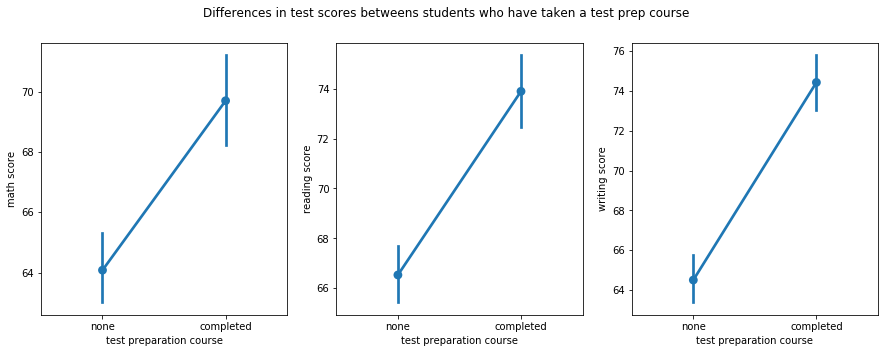

In [52]:
fig, axes = plt.subplots(1,3,figsize=(15,5))

sns.pointplot(x='test preparation course', y='math score', data=students_df, ax=axes[0])

sns.pointplot(x='test preparation course', y='reading score', data=students_df, ax=axes[1])

sns.pointplot(x='test preparation course', y='writing score', data=students_df, ax=axes[2])

plt.suptitle('Differences in test scores betweens students who have taken a test prep course')
plt.show()

In [54]:
#Prep course differences in test performance

test_variables = ['math score', 'reading score', 'writing score']

for variable in test_variables:
    p = list(stats.ttest_ind(students_df[students_df['test preparation course']== 'none'][variable], 
              students_df[students_df['test preparation course']== 'completed'][variable]))[1]
    if p < 0.05:
        print('Significant differences in {} between students who completed a test prep course'.format(variable))
        print('p-value = {}'.format(p) + '\n')

Significant differences in math score between students who completed a test prep course
p-value = 1.5359134607147415e-08

Significant differences in reading score between students who completed a test prep course
p-value = 9.081783336892205e-15

Significant differences in writing score between students who completed a test prep course
p-value = 3.68529173524572e-24



# 4. Which 2 exam scores are most correlated with each other?

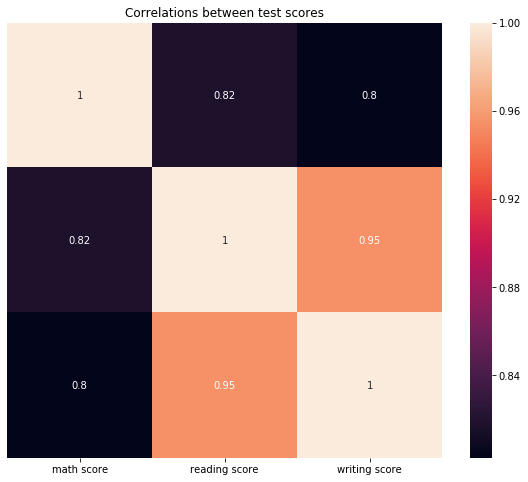

In [97]:
corrs = students_df[test_variables].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corrs, square=True, annot=True, yticklabels=False)
plt.title('Correlations between test scores')
plt.show()

Reading and writing scores are the most correlated with eachother